In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy as sp
from sklearn import datasets as ds

%matplotlib inline

# 1. Batch Gradient Descent

- Defintion: 
$$\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta} J(\theta)$$


# SGD的优缺点

SGD只使用样本中的部分数据，所以学习速度比较快，不用遍历整个数据集，代码参见`sgd` 函数,  而Batch GD是需要遍历整个数据集合的



- 优点
  
   - 学习速度快
   - 实现简单
   
- 缺点
   - 对数据的sclaer敏感
   - 需要额外的超参数控制迭代次数和学习速率

In [158]:
def f(x, w):
    """
    x: np.array
    w: np.array
    """
    return sum(x * w)
def J(X, Y, w):
    return np.sum(np.power(X * w - Y.reshape(X.shape), 2)) / (len(X) * 2)
    
def compute_gd(x, y, w):
    return (f(x, w) - y) * x

def batch_gd(X, Y, w=None, iter=10, is_plot=False):
    n_features = X.shape[1]
    n_samples = len(Y)
    if w is None:
        w = np.random.rand(n_features)
    gd = w
    it=1
    loss = []
    while(it <= iter):
        # print('iter {0}: {1}'.format(it, gd))
        if is_plot:
            plt.scatter(X.reshape(n_features, n_samples), Y.reshape(n_features, n_samples))
            plt.plot(X, gd * X)
         
        loss.append(J(X, Y, gd))
        # batch 
        for x, y in zip(X, Y):
            gd_new = compute_gd(x, y, gd)
            gd = gd - gd_new * 0.01
        it = it + 1
    loss.append(J(X, Y, gd))
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Batch-GD Paramter change')
    plt.show()
    
    if is_plot:
        plt.plot(range(0, len(loss)), loss)
        plt.xlabel('Iter')
        plt.ylabel('Loss')
        plt.title('Batch-GD Learning Rate')
        plt.show()
    print gd
            
    return gd

def sgd(X, Y, w=None, max_iter=100, is_plot=False, learning_rate=0.01, convergence_threshold=0.0001):
    n_features = X.shape[1]
    n_samples = len(Y)
    if w is None:
        w = np.random.rand(n_features)
    gd = w
    it = 1
    loss = []
    cnt_iter = 1
    while cnt_iter <= max_iter:
        
        # Note: random choice a sample from dataset
        idx = np.random.choice(n_samples)
        x, y = X[idx], Y[idx]
        loss.append(J(X, Y, gd))
        gd_new = compute_gd(x, y, gd)
        gd = gd - gd_new * learning_rate
        cnt_iter = cnt_iter + 1
        if np.abs(gd - gd_new) < np.array([convergence_threshold] * n_features):
            break
            
    if is_plot:
        plt.plot(range(1, cnt_iter), loss)
        plt.xlabel('Iter')
        plt.ylabel('Loss')
        plt.title('SGD Learning Rate')
        plt.show()
        plt.show()
        plt.scatter(X.reshape(n_features, n_samples), Y.reshape(n_features, n_samples))
        plt.plot(X, gd * X)
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('SGD Paramter change')
        plt.show()
    return gd
    
                         

In [161]:
n_samples = 100
n_features = 1
noise = 8
samples = ds.make_regression(n_samples=n_samples, n_features=n_features, noise=noise )

X = samples[0]
Y = samples[1]

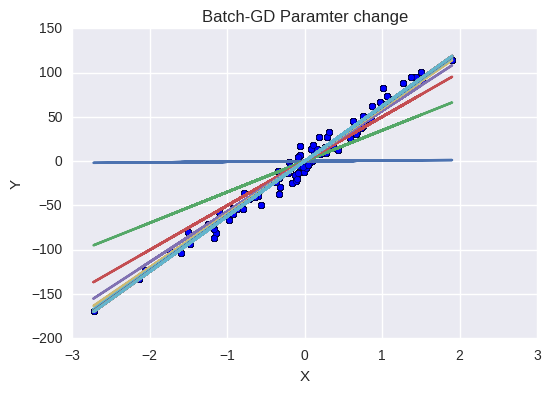

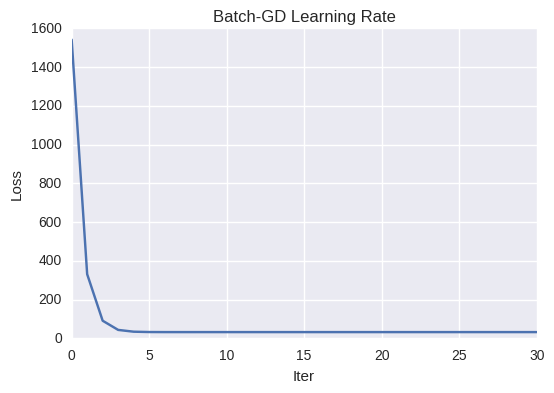

[ 62.41246669]


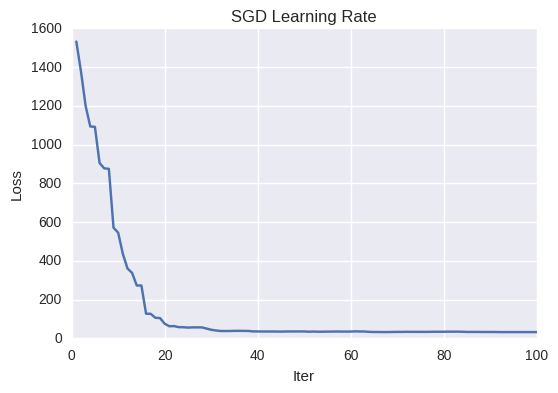

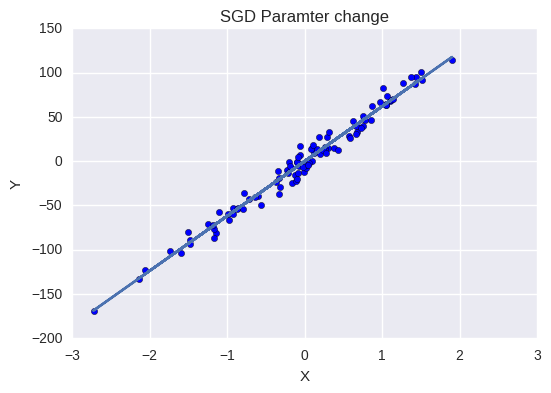

array([ 61.87262213])

In [162]:
batch_gd(X, Y, iter=30, is_plot=True)
sgd(X, Y, is_plot=True, max_iter=100, learning_rate=0.05)